# Introduction to Regression with NN in TF

In [54]:
import tensorflow as tf
tf.__version__

'2.15.0'

## Creating a data to view and fit

In [55]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2, 5, 8, 11, 14])
y = np.array([3.0, 6, 9, 12, 15, 18, 21, 24])
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

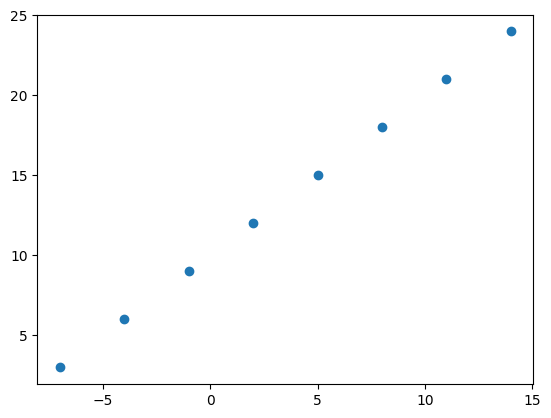

In [56]:
plt.scatter(X,y)

In [57]:
# This is the relation betweeen X and y. This is what we want our ML model to learn
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [58]:
X.shape, y.shape

((8,), (8,))

In [59]:
X[0].shape, y[0].shape

((), ())

In [60]:
#turn it into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

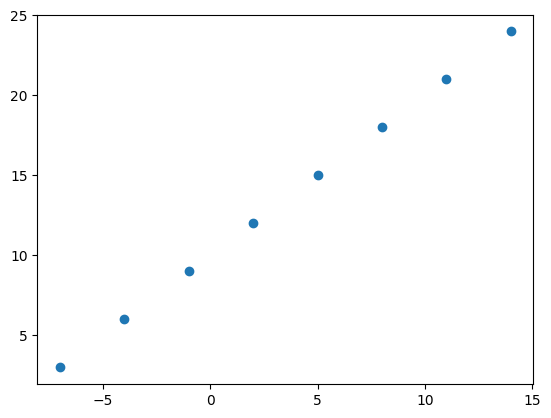

In [61]:
plt.scatter(X,y)

## Steps for modelling with TF

1. creating a model (define in, out and hidden layers)
2. Compile a model (define loss function, optimzer, eval metrics)
3. Fitting a model (patterns betwwen features and labels)

In [62]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# model=tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #equivaklent to optimizer="sgd"
              metrics=["mae"])

#fit model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 401ms/step - loss: 14.5222 - mae: 14.5222
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 14.3897 - mae: 14.3897
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 14.2572 - mae: 14.2572
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 14.1247 - mae: 14.1247
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 13.9922 - mae: 13.9922


In [63]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [64]:
#try and make a prediction using model
model.predict([17.0]) ## We EXPECT 27

1/1 [==============================] - 0s 83ms/step


array([[-1.9397856]], dtype=float32)

## Improving our model

We can improve model by alterating any/each of the three steps above:
1. creating: add more layers, increase num of hidden units, chnage activation function of each layer
2. Compiling: Change opt function, lr of said optimizer
3. Fitting: increase epochs(training for longer), or on more data

In [65]:
# Lets rebuild the model
#PRACTICE TIME
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 400ms/step - loss: 15.4928 - mae: 15.4928
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 15.2115 - mae: 15.2115
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.9460 - mae: 14.9460
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.8135 - mae: 14.8135
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 14.6810 - mae: 14.6810
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 14.5485 - mae: 14.5485
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4160 - mae: 14.4160
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2835 - mae: 14.2835
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1510 - mae: 14.1510
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0185 - mae: 14.0185
Epoch 11/100
1/1 [==============================

In [66]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[29.50368]], dtype=float32)

In [67]:
###MORE PRACTICE - get better
#VIOLA!!!!! Adam rocks!
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 448ms/step - loss: 7.9069 - mae: 7.9069
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4569 - mae: 7.4569
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 7.3500 - mae: 7.3500
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2763 - mae: 7.2763
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3834 - mae: 7.3834
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 7.3920 - mae: 7.3920
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 7.3263 - mae: 7.3263
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2094 - mae: 7.2094
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.0552 - mae: 7.0552
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 6.8728 - mae: 6.8728
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [68]:
model.predict([17.0])

1/1 [==============================] - 0s 76ms/step


array([[27.496822]], dtype=float32)

In [69]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
model.trainable_variables

[<tf.Variable 'dense_20/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0385429]], dtype=float32)>,
 <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32, numpy=array([9.841592], dtype=float32)>]

In [71]:
model.trainable_weights

[<tf.Variable 'dense_20/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0385429]], dtype=float32)>,
 <tf.Variable 'dense_20/bias:0' shape=(1,) dtype=float32, numpy=array([9.841592], dtype=float32)>]

In [72]:
model.trainable_variables==model.trainable_weights

True

In [73]:
# ###MORE PRACTICE

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(1))

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=["mae"])
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

In [74]:
# model.predict([17.0])

In [75]:
# model.summary()

In [76]:
# model.trainable_variables

## Evaluating a model

Typical workflow:
1. build a model (Experiment, Experiment, Experiment)
2. Fit it
3. Evaluate it (visualize,visualize,visualize)

Tweak and repeat

What can we vizualize:
* data (What data are we working with, what does it look like?)
* model itself (what does our model look like)
* training of our model (how does a model perform while it learns?)
* predictions of our model(how do predictions of our model lines up with the ground truth)

In [77]:
# Make a bigger dataset
X=tf.range(-100,100, 4)
y=X+10

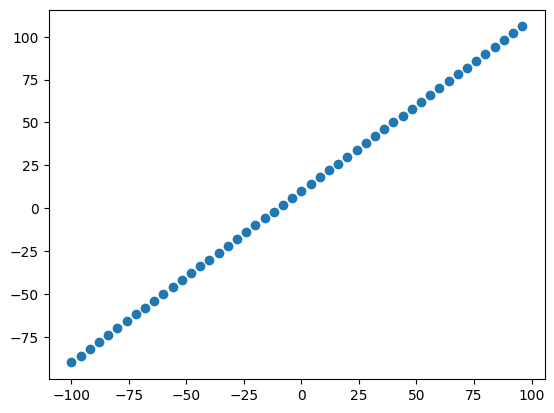

In [78]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

### Three sets

* Training set : model learns from this data (70-80% data)
* Validation set: model gets tuned on this data (10-15%)
* Test set: model gets evaluated on this data to test what it has learned (10-15%)


In [79]:
len(X)

50

In [80]:
#Split the data into train and test sets
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Vizualing Data

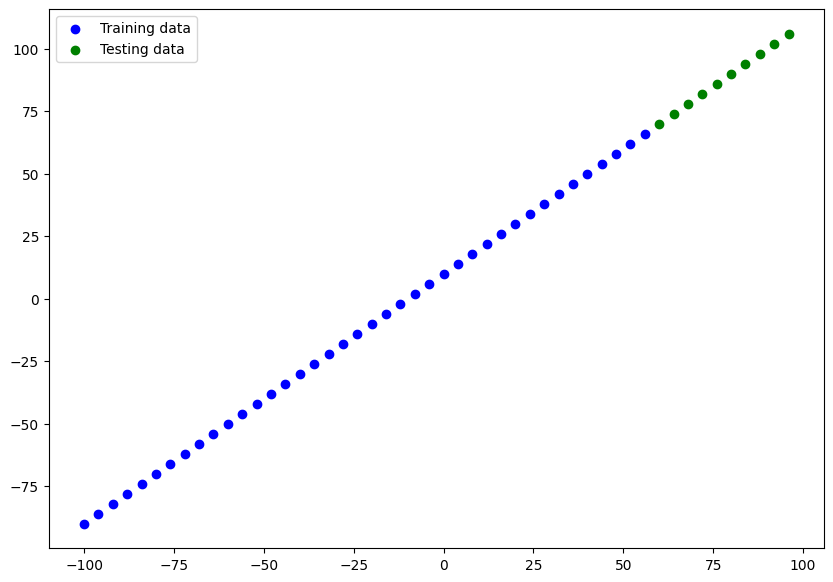

In [81]:
## Visualizing data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [96]:
# Build a NN for our data
##NOTICE: build a model automatically by specifying an input shape argument in the first layer!!
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1], name="output_layer")
], name="model_0")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])


In [97]:
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 110.1871 - mae: 110.1871
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 101.3944 - mae: 101.3944
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 92.9172 - mae: 92.9172
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 84.3062 - mae: 84.3062
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 75.8560 - mae: 75.8560
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 67.3302 - mae: 67.3302
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 58.7332 - mae: 58.7332
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 49.9088 - mae: 49.9088
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 41.6820 - mae: 41.6820
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 33.5111 - mae: 33.5111
Epoch 11/100
2/2 [==============================] -

In [99]:
model.predict(X_test), y_test

1/1 [==============================] - 0s 54ms/step


(array([[ 70.770996],
        [ 74.82491 ],
        [ 78.87884 ],
        [ 82.932755],
        [ 86.98668 ],
        [ 91.0406  ],
        [ 95.09452 ],
        [ 99.148445],
        [103.20237 ],
        [107.25629 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [100]:
from tensorflow.keras.utils import plot_model

### Vizualzing model

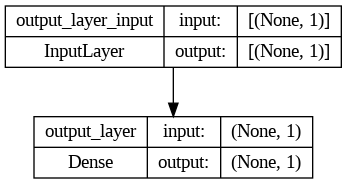

In [101]:
plot_model(model, show_shapes=True)

### Vizualing model's predictions

Plot them against the ground truth labels

In [102]:
# make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 23ms/step


array([[ 70.770996],
       [ 74.82491 ],
       [ 78.87884 ],
       [ 82.932755],
       [ 86.98668 ],
       [ 91.0406  ],
       [ 95.09452 ],
       [ 99.148445],
       [103.20237 ],
       [107.25629 ]], dtype=float32)

In [103]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [105]:
### Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training, test data against predictions
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

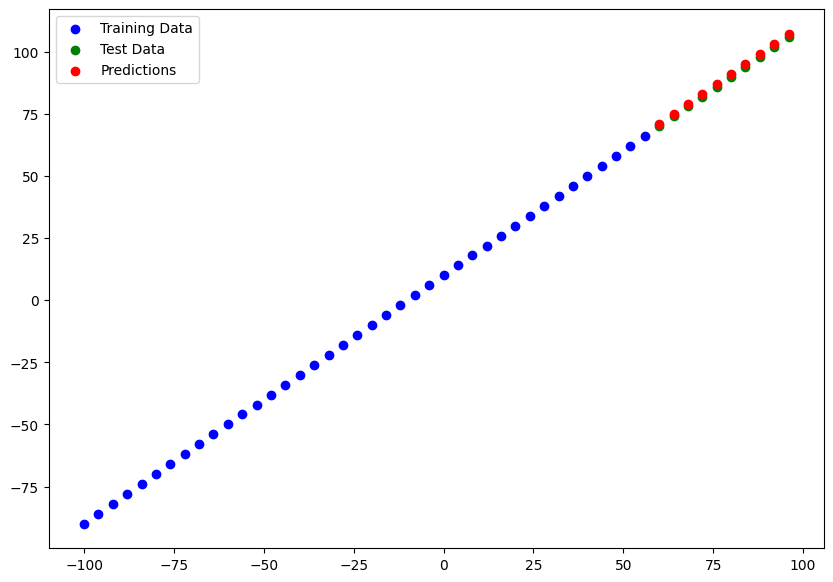

In [106]:
plot_predictions()

### Evaluating models predictions with Regression evaluation metrics

For regression: MAE, MSE, Huber

In [109]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 282ms/step - loss: 1.0136 - mae: 1.0136


[1.0136406421661377, 1.0136406421661377]

In [111]:
tf.metrics.mean_absolute_error(y_test, y_pred)

###WEIRD: CHECK SHAPES

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.383204, 14.305052, 12.048465, 10.613449, 10.      , 10.20812 ,
       11.237808, 13.089067, 15.761896, 19.256287], dtype=float32)>

In [112]:
y_test.shape

TensorShape([10])

In [113]:
y_pred.shape

(10, 1)

In [115]:
y_pred

array([[ 70.770996],
       [ 74.82491 ],
       [ 78.87884 ],
       [ 82.932755],
       [ 86.98668 ],
       [ 91.0406  ],
       [ 95.09452 ],
       [ 99.148445],
       [103.20237 ],
       [107.25629 ]], dtype=float32)

In [118]:
y_pred=tf.constant(y_pred)
y_pred.shape

TensorShape([10, 1])

In [119]:
###ONE EXTRA DIMENSION
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.770996,  74.82491 ,  78.87884 ,  82.932755,  86.98668 ,
        91.0406  ,  95.09452 ,  99.148445, 103.20237 , 107.25629 ],
      dtype=float32)>

In [121]:
###CALCULATE MAE

###NOTICE:::: SAME OUTPUT AS evaluate!

mae= tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.0136406>

In [122]:
###Calculate mean squared error

mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.0514545>

In [126]:
### Huber

huber=tf.keras.losses.Huber()
huber(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5187645>

In [127]:
# Make a function to print metrics

def print_eval(y_true=y_test, y_pred=y_pred):
  mae = tf.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.metrics.mean_squared_error(y_true, y_pred)
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")

In [128]:
print_eval(y_test, tf.squeeze(y_pred))

MAE: 1.0136406421661377
MSE: 1.0514545440673828


## Trying 3 Experimental Models for same data

1. model 1: same as orig
2. model 2: 2 layers, 100 epochs
3. model 3: 2 layers, 500 epochs

In [133]:
## model_1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 80.1760 - mae: 80.1760
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 76.6305 - mae: 76.6305
Epoch 3/100
2/2 [==============================] - 0s 20ms/step - loss: 72.8467 - mae: 72.8467
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 69.1862 - mae: 69.1862
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 65.5469 - mae: 65.5469
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 62.0997 - mae: 62.0997
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 58.6674 - mae: 58.6674
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 54.9830 - mae: 54.9830
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 50.7808 - mae: 50.7808
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 47.0924 - mae: 47.0924
Epoch 11/100
2/2 [==============================]

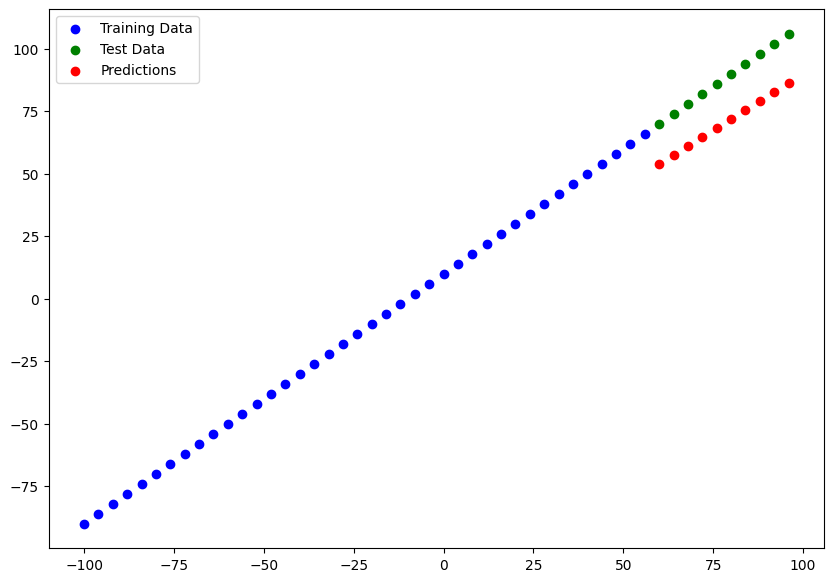

In [136]:
#Make and plot predictiosn for model_1
y_preds_1 = model_1(X_test)
plot_predictions(predictions=y_preds_1)

In [137]:
print_eval(y_test, tf.squeeze(y_preds_1))

MAE: 17.884469985961914
MSE: 321.2418212890625


### Excursion: Understanding what went wrong without tf.squeeze()

In [138]:
y_preds_1, tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.960983],
        [57.55088 ],
        [61.140778],
        [64.73068 ],
        [68.32058 ],
        [71.91048 ],
        [75.50038 ],
        [79.09028 ],
        [82.680176],
        [86.27007 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.960983, 57.55088 , 61.140778, 64.73068 , 68.32058 , 71.91048 ,
        75.50038 , 79.09028 , 82.680176, 86.27007 ], dtype=float32)>)

In [140]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [139]:
tf.metrics.mean_absolute_error(y_test, y_preds_1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.039017, 30.449121, 26.859222, 23.269318, 19.67942 , 16.471619,
       13.899771, 11.963888, 10.663965, 10.      ], dtype=float32)>

In [148]:
np.mean(abs(np.array([53.960983, 57.55088 , 61.140778, 64.73068 , 68.32058 , 71.91048 ,75.50038 , 79.09028 , 82.680176, 86.27007 ]) - np.array([70]*10)))

8.9747485

In [150]:
np.mean(abs(np.array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])-np.array([53.960983]*10)))

34.039017

In [151]:
## Build model_2
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 36ms/step - loss: 30.6547 - mse: 1324.4622
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 24.0175 - mse: 746.7255
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 30.2785 - mse: 1338.5961
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 22.9382 - mse: 755.8387
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7224 - mse: 228.8603
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 11.0125 - mse: 133.9641
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 11.9921 - mse: 180.4578
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8236 - mse: 131.3693
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 37.2500 - mse: 2132.6875
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 24.9564 - mse: 873.1392
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 100ms/step


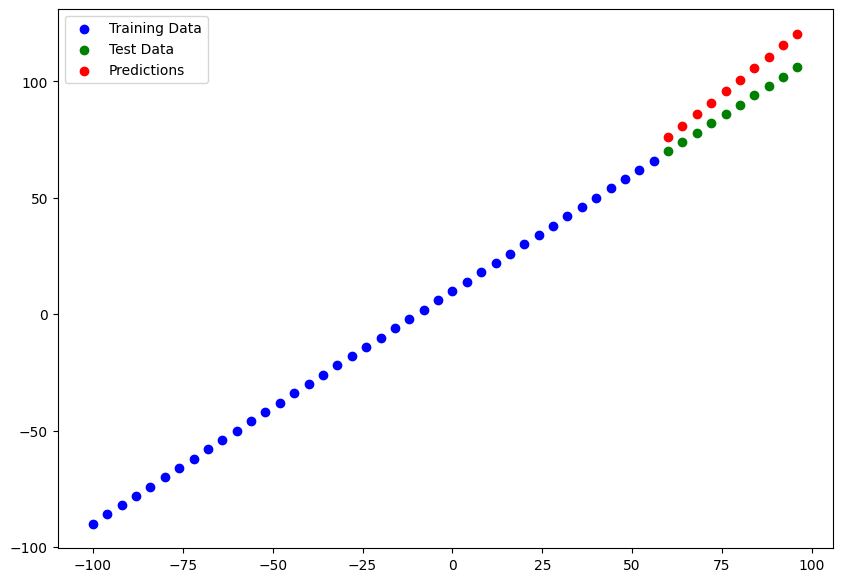

In [152]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [153]:
print_eval(y_test, tf.squeeze(y_preds_2))

MAE: 10.190092086791992
MSE: 111.21623229980469


In [159]:
##model_3

tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 18ms/step - loss: 54.9366 - mse: 4723.5254
Epoch 2/500
2/2 [==============================] - 0s 16ms/step - loss: 29.7603 - mse: 1159.6974
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 34.4615 - mse: 1797.9670
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 29.1491 - mse: 1258.1277
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 15.7752 - mse: 325.7520
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 12.4975 - mse: 202.3321
Epoch 7/500
2/2 [==============================] - 0s 17ms/step - loss: 11.7580 - mse: 170.8950
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 12.1127 - mse: 204.0414
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 38.1305 - mse: 2248.7407
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 25.7010 - mse: 927.9344
Epoch 11/500
2/2 [======================

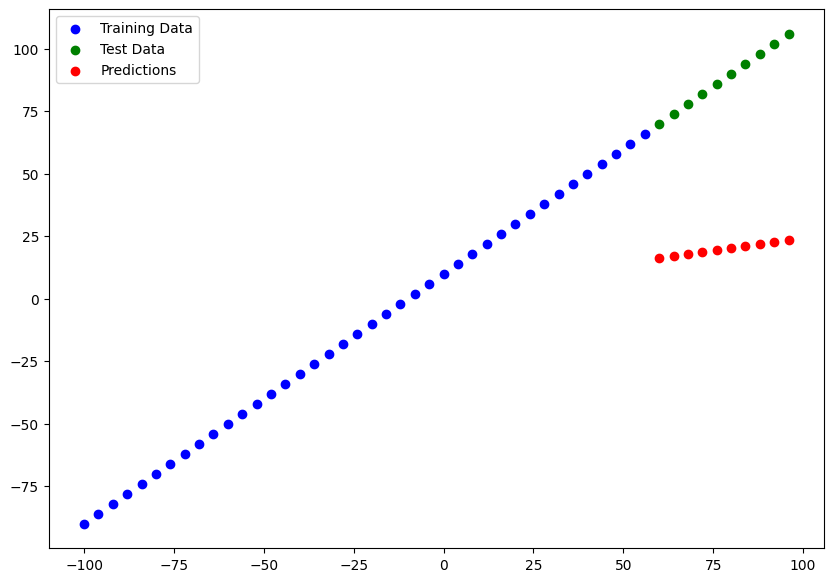

In [160]:
y_preds_3=model_3(X_test)
plot_predictions(predictions=y_preds_3)

In [161]:
print_eval(y_true=y_test, y_pred=tf.squeeze(y_preds_3))

MAE: 67.96028137207031
MSE: 4702.96240234375


## Comparing the results of experminets

In [162]:
import pandas as pd

model_results =[["model_1",17.884469985961914,321.2418212890625],
                ["model_2",10.190092086791992,111.21623229980469],
                ["model_3",67.96028137207031,4702.96240234375]]
all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])

In [163]:
all_results

,model,mae,mse
0,model_1,17.884470,321.241821
1,model_2,10.190092,111.216232
2,model_3,67.960281,4702.962402


In [164]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking your Experiments

1. TensorBoard
2. Weights & Biases
3. MLFlow

## Saving our models

2 main formats: SavedModel, HDF5

In [165]:
model_2.save("best_model_savedModel_format")

In [166]:
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading our model

In [171]:
loaded_savedModel_format = tf.keras.models.load_model("/content/best_model_savedModel_format")
loaded_savedModel_format.trainable_variables

[<tf.Variable 'dense_28/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 0.59373397, -0.4918663 , -0.15884799, -0.42439884,  0.23313558,
          0.12881786,  0.24447316, -0.24951419, -0.43311018, -0.20978838]],
       dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.46069276, -0.3776471 , -0.12689123, -0.3298669 ,  0.18345213,
         0.10514853,  0.19225825, -0.19234689, -0.33980086, -0.16350494],
       dtype=float32)>,
 <tf.Variable 'dense_29/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[ 0.5995668 ],
        [-0.4966454 ],
        [-0.16045669],
        [-0.42857558],
        [ 0.23545972],
        [ 0.13015217],
        [ 0.24690883],
        [-0.25194877],
        [-0.43741453],
        [-0.21185893]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([0.7874996], dtype=float32)>]

In [172]:
 model_2.trainable_variables

[<tf.Variable 'dense_28/kernel:0' shape=(1, 10) dtype=float32, numpy=
 array([[ 0.59373397, -0.4918663 , -0.15884799, -0.42439884,  0.23313558,
          0.12881786,  0.24447316, -0.24951419, -0.43311018, -0.20978838]],
       dtype=float32)>,
 <tf.Variable 'dense_28/bias:0' shape=(10,) dtype=float32, numpy=
 array([ 0.46069276, -0.3776471 , -0.12689123, -0.3298669 ,  0.18345213,
         0.10514853,  0.19225825, -0.19234689, -0.33980086, -0.16350494],
       dtype=float32)>,
 <tf.Variable 'dense_29/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[ 0.5995668 ],
        [-0.4966454 ],
        [-0.16045669],
        [-0.42857558],
        [ 0.23545972],
        [ 0.13015217],
        [ 0.24690883],
        [-0.25194877],
        [-0.43741453],
        [-0.21185893]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(1,) dtype=float32, numpy=array([0.7874996], dtype=float32)>]

In [173]:
loaded_y_preds_1= loaded_savedModel_format.predict(X_test)
loaded_y_preds_1 == y_preds_2

1/1 [==============================] - 0s 79ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [174]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                20        
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
loaded_h5_preds = loaded_h5_model.predict(X_test)
loaded_h5_preds == y_preds_2

1/1 [==============================] - 0s 281ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
##download files from Google Colab
from google.colab import files
files.download("/content/best_model_savedModel_format")